# Week 3 Homework

### Raymundo Gonzalez Leal

#### Problem 1
Create your own probability distribution. Pick the support of your distribution and define any function you want over that domain. Will your pdf have one mode or multiple modes? Will it be skew or symmetric? Where will most of the probability mass be? What are the parameters of your distribution? Remember, any non-negative function that integrates to 1 over the support is a valid probability distribution.

Support: $x \in (-\infty, \infty)$

Function:   $ y = \frac{1}{2}* e^{-|x-\mu | }$

Note: I computed the integral of this expression in wolfram alpha for our support, and the value is 2 regardless of $\mu$ without the $\frac{1}{2}$ factor. Hence this factor makes the integral have a value of 1, which is what we need for a probability distribution.


PDF has single mode in $\mu$, and is symetric around the mean $\mu$

The only parameter is the mean $\mu$. 

The majority of the probability density is centered around $\mu$. This function looks like a symmetrical exponential function.

Note: After completing this exercise I googled for symmetrical exponential distributions, and realized that this is a special case of the Laplace distribution. Our distribution results from setting the scale parameter b in the Laplace distribution to 1. 

#### (Optional) Stretch goal: 

write R functions for the cdf, pdf, qf and random samples from your distribution. For the distributions defined in R, these are the d, p, q, r functions. For example, for the normal distribution, these functions dnorm() is the probability density function, pnorm() is the cumulative distribution function, qnorm is the quantile function, and rnorm() generates random samples from the distribution. For a reference on the parameters that get passed to these functions in R, see: https://cran.r-project.org/doc/manuals/r-release/R-intro.html#Probability-distributions


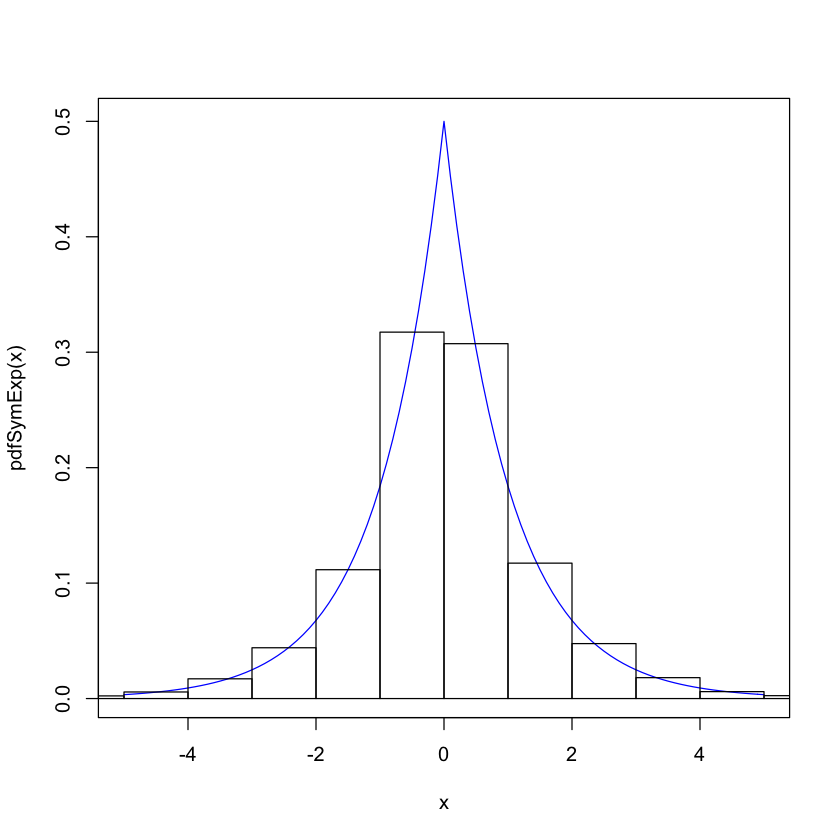

In [22]:
##PDF
pdfSymExp<- function(x, mu = 0) {
            ans <- numeric(length = length(x))
            for (i in seq_along(x)) {
                ans[i] <- 0.5 * exp(-abs(x[i]-mu)) 
            }
ans }

##Random Sample
rSymExp <- function(n, mu = 0) {
           sample(seq(-1000, 1000, 0.001), n, 
                prob = pdfSymExp(seq(-1000, 1000, 0.001), 
                mu = mu), replace = TRUE)
            }

curve(pdfSymExp(x), -5, 5, col = "blue")
hist(rSymExp(10000), probability = T, add = T)


#### Problem 2.

Derive the posterior distribution, including its parameter values, from an exponential likelihood function with a gamma prior over the exponential parameter λ, and with data yᵢ for i = 1, 2, …, n.

Prior: $f(\lambda) = Gamma(\alpha,\beta) = c_1\lambda^{\alpha-1}e^{-\beta\lambda}$

Likelihood: $f(y | \lambda) = \lambda^n e^{-\lambda \sum_{i=1}^ny_i}$

Posterior: $f(\lambda) \propto (\lambda^{\alpha-1}e^{-\beta\lambda}) * \lambda^n e^{-\lambda \sum_{i=1}^ny_i} = \lambda^{\alpha+n-1}e^{-\lambda (\beta + \sum_{i=1}^ny_i )}  = Gamma(\alpha + n, \beta + \sum_{i=1}^ny_i ) $